In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as py
import numpy as np
%matplotlib inline

In [4]:
pwd

'C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Regression Models'

In [5]:
df=pd.read_csv('C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Regression Models\\china_gdp.csv')
df.head(9)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10


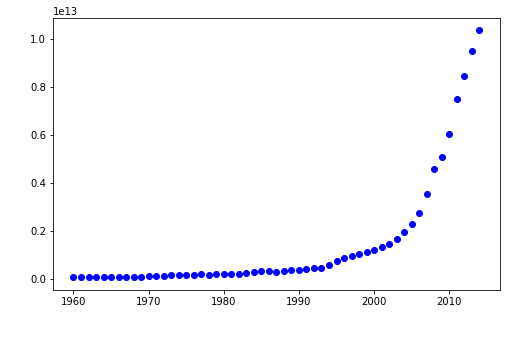

In [151]:
plt.figure(figsize=(8,5))
x_data,y_data=(df['Year'].values,df['Value'].values)
plt.plot(x_data,y_data,'ro',color='blue')
plt.xlabel("Years",color='white',size=20)
plt.ylabel("GDP",color='white',size=20)
plt.show()

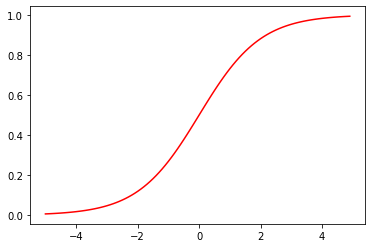

In [152]:
X=np.arange(-5,5,0.1)
Y=1/(1+np.exp(-X))
plt.plot(X,Y,'-r')
plt.show()

In [153]:
def sigmoid(x,Beta_1,Beta_2):
       y=1/(1+np.exp(-Beta_1*(x-Beta_2)))
       return y

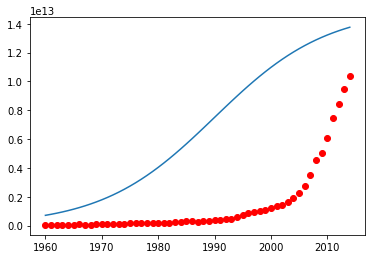

In [154]:
beta_1=0.1
beta_2=1990
y_pred=sigmoid(x_data,beta_1,beta_2)
plt.plot(x_data,y_pred*15000000000000.)
plt.plot(x_data,y_data,'ro')
plt.show()

In [155]:
xdata=x_data/max(x_data)
ydata=y_data/max(y_data)

In [156]:
from scipy.optimize import curve_fit
popt,pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451710, beta_2 = 0.997207


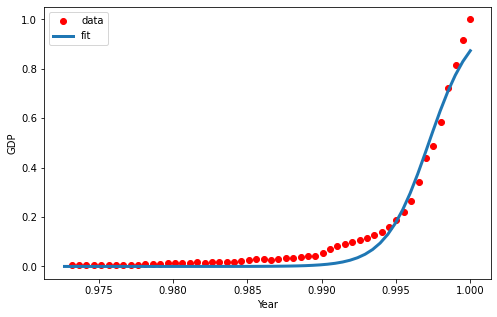

In [157]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [158]:
msk=np.random.random(len(df))<0.3
train=df[msk]
test=df[~msk]

train_x=xdata[msk]
train_y=ydata[msk]
test_x=xdata[~msk]
test_y=ydata[~msk]

popt,pcov=curve_fit(sigmoid,train_x,train_y)
y_hat=sigmoid(test_x,*popt)

print("The Mean Absolute Error is : %.2f" %np.mean(np.absolute(y_hat-test_y)))
print("The Mean Residual Error is : %.2f "%np.mean((y_hat-test_y)**2))
from sklearn.metrics import r2_score
print("The R2_score is : %.2f" %r2_score(test_y,y_hat))



The Mean Absolute Error is : 0.03
The Mean Residual Error is : 0.00 
The R2_score is : 0.96
